In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics/HR_comma_sep.csv


**The dataset used below has 10 different columns and based on the input features like department, salary, work satisfaction etc, we need to build a model to predict whether an employee will leave the company or not**

In [21]:
df = pd.read_csv('../input/hr-analytics/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [23]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [24]:
df.corr().style.background_gradient(cmap='GnBu')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Text(0.5, 1.0, 'Time Spent in company v/s left')

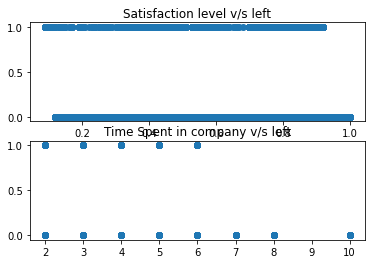

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].scatter(df['satisfaction_level'],df['left'])
ax[0].set_title('Satisfaction level v/s left')
ax[1].scatter(df['time_spend_company'],df['left'])
ax[1].set_title('Time Spent in company v/s left')
#plt.show()

In [35]:
grp = df.groupby('salary').left.value_counts()
print(grp)
#print(grp['high'])
#cat = df['salary'].unique()
left_1 = grp[1::2]
left_0 = grp[0::2]
cat = ['high','low','medium']

salary  left
high    0       1155
        1         82
low     0       5144
        1       2172
medium  0       5129
        1       1317
Name: left, dtype: int64


<BarContainer object of 3 artists>

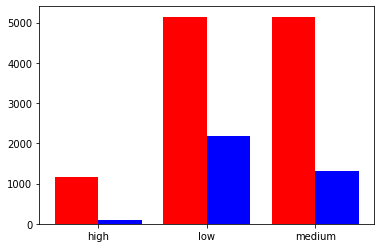

In [36]:
xpos = np.arange(len(cat))
plt.xticks(xpos,cat)
plt.bar(xpos+0.2,left_1,color='b', width=0.4)
plt.bar(xpos-0.2,left_0,color='r', width=0.4)

In [37]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [38]:
dept = df.groupby('Department').left.value_counts()
cat2 = ['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical']
left_1 = dept[1::2]
left_0 = dept[0::2]

<BarContainer object of 10 artists>

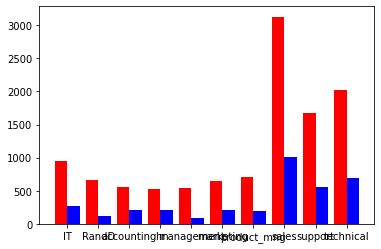

In [39]:
xpos = np.arange(len(cat2))
plt.xticks(xpos,cat2)
plt.bar(xpos+0.2,left_1,color='b', width=0.4)
plt.bar(xpos-0.2,left_0,color='r', width=0.4)  #sales have highest not left and left employees

In [40]:
y=df['left']
X=df.drop(['left'],axis=1)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [42]:
# from sklearn.preprocessing import OneHotEncoder
# onh = OneHotEncoder(sparse=False)
# dept_encoded = onh.fit_transform((X_train[['Department']]))
# dept_encoded

In [46]:
X_train_encoded = pd.get_dummies(X_train, columns=['Department','salary'])
X_test_encoded = pd.get_dummies(X_test, columns=['Department','salary']) 

In [47]:
cols = X_train_encoded.columns
num_cols = X_train_encoded._get_numeric_data().columns
cat_cols = set(cols)-set(num_cols)
num_cols

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [48]:
X_train_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
10165,0.57,0.89,3,202,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3665,0.91,0.53,3,147,4,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8343,0.99,0.54,3,199,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
11830,0.63,0.50,2,230,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
11655,0.56,0.71,5,244,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [49]:
X_train_encoded = X_train_encoded.drop(['last_evaluation','Department_marketing',],axis=1) 
X_test_encoded = X_test_encoded.drop(['last_evaluation','Department_marketing',],axis=1) 

In [50]:
df2 = pd.get_dummies(df, columns=['Department','salary'])
df2.corr().style.background_gradient(cmap='GnBu')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.006373,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,0.029708,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.001269,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,-0.020628,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.003287,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.008726,-0.002504,0.007377
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.006967,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,-0.007101,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.006053,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,0.039953,-0.040110,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.009293,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,0.009040,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.010925,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,-0.120929,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.038942,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,0.076756,-0.082832,0.040985
Department_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.010925,-0.038942,1.000000,-0.070240,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,-0.016089,0.005116,0.003775
Department_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,-0.070240,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.015115,-0.011887,0.020402


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_encoded2 = X_train_encoded.copy()
X_train_encoded2[['average_montly_hours','number_project','time_spend_company']] = scaler.fit_transform(X_train_encoded[['average_montly_hours','number_project','time_spend_company']])
X_test_encoded2 = X_test_encoded.copy()
X_test_encoded2[['average_montly_hours','number_project','time_spend_company']] = scaler.fit_transform(X_test_encoded[['average_montly_hours','number_project','time_spend_company']])

In [53]:
X_train_encoded2.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
10165,0.57,0.2,0.495327,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3665,0.91,0.2,0.238318,0.250,1,0,0,0,0,0,0,0,0,1,0,1,0,0
8343,0.99,0.2,0.481308,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,1
11830,0.63,0.0,0.626168,0.250,0,0,0,0,0,0,0,0,1,0,0,0,0,1
11655,0.56,0.6,0.691589,0.125,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',random_state=2021)
lr.fit(X_train_encoded,y_train)

LogisticRegression(random_state=2021, solver='liblinear')

In [61]:
y_pred = lr.predict(X_test_encoded)
print('The accuracy of this score is: ',lr.score(X_test_encoded,y_test))

The accuracy of this score is:  0.793


In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# import tensorflow as tf
# from tensorflow import keras
from keras import Sequential
# from tensorflow.keras import layers
model = Sequential()
model.add(layers.Dense(10,input_dim=18,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
model.fit(X_train_encoded,y_train,batch_size=50,epochs=100)

Epoch 1/100
240/240 [==============================] - 1s 1ms/step - loss: 0.7603 - accuracy: 0.7185
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 0.5711 - accuracy: 0.7610
Epoch 3/100
240/240 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.7601
Epoch 4/100
240/240 [==============================] - 0s 1ms/step - loss: 0.5254 - accuracy: 0.7739
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7571
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7514
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7573
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.7699
Epoch 9/100
240/240 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.7586
Epoch 10/100
240/240 [==============================] - 0s 1ms/step - loss: 0.4499 - accura

In [59]:
pred_proba = model.predict(X_test_encoded)
pred=[]
for i in pred_proba:
    if(i>=0.5):
        pred.append(1)
    else:
        pred.append(0)
#pred contains the final predicted value

In [60]:
_,acc= model.evaluate(X_test_encoded,y_test, verbose=0)
print('The accuracy on test dataset is: ', acc)

The accuracy on test dataset is:  0.934333324432373
